In [19]:
import pandas as pd #prepocessing data
import matplotlib.pyplot as plt #visualisasi grafis di plot
import seaborn as sns #visualisasi data yang lebih menarik

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [3]:
dataframeasli = pd.read_csv("iris.data")
dataframeasli.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [5]:
#mendefinisikan nama kolom data

columnNames  = ["sepal_length_in_cm","sepal_width_in_cm", "petal_width_in_cm","class"]

#baca data set
dataframe = pd.read_csv("iris.data",header=None,names=columnNames)

dataframe.head()

,sepal_length_in_cm,sepal_width_in_cm,petal_width_in_cm,class
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
#ganti nama class menjadi angka
dataframe = dataframe.replace({
    "class": {
        "Iris-setosa" : 1,
        "Iris-versicolor" : 2,
        "Iris-virginica" : 3,
    }
})

print(dataframe)

     sepal_length_in_cm  sepal_width_in_cm  petal_width_in_cm  class
5.1                 3.5                1.4                0.2      1
4.9                 3.0                1.4                0.2      1
4.7                 3.2                1.3                0.2      1
4.6                 3.1                1.5                0.2      1
5.0                 3.6                1.4                0.2      1
..                  ...                ...                ...    ...
6.7                 3.0                5.2                2.3      3
6.3                 2.5                5.0                1.9      3
6.5                 3.0                5.2                2.0      3
6.2                 3.4                5.4                2.3      3
5.9                 3.0                5.1                1.8      3

[150 rows x 4 columns]


Text(0.5, 1.0, 'Correlation on iris classes')

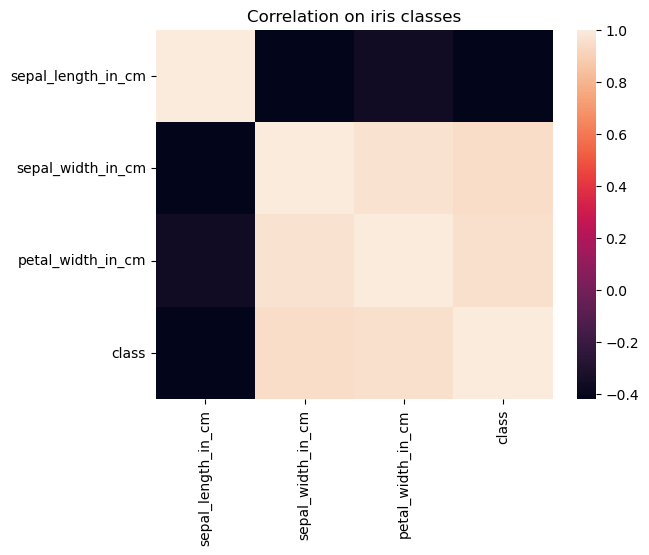

In [10]:
plt.figure(1)
sns.heatmap(dataframe.corr())
plt.title('Correlation on iris classes')

In [21]:
#pisah data training dan data testing
x = dataframe.iloc[:,:-1] #fitur
y = dataframe.iloc[:,-1] #target

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state = 0)

In [24]:
#modeling data
classifier = SVC(kernel = 'linear', random_state=0)

#fit model SVM ke data
classifier.fit(X_train, y_train)

#membuat prediksi
y_pred = classifier.predict(X_test)

In [28]:
#evaluasi model svm menggunakan matrices accuracy
cm = confusion_matrix(y_test,y_pred)
print(cm)

#evaluasi performa model dengan accuracy
accuracies = cross_val_score(estimator = classifier, X = X_train, y= y_train, cv = 10)
print("Accuracy: {:2f}%".format(accuracies.mean()*100))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Accuracy: 96.363636%
